In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns

import sys
sys.path.append("../..")
from utils import utils
from utils.plotting_utils import plots

In [2]:
def calc_transfer_loss(row, data):
    cond = (
        (data["Train-Language"] == row["Train-Language"]) &
        (data["Test-Language"] == row["Train-Language"]) &
        (data["Model"] == row["Model"]) &
        (data["Size"] == row["Size"])
    )
    within_score = data.loc[cond, "Score"].values
    assert len(within_score) == 1
    within_score = within_score[0]
    return within_score - row["Score"]

### PoS

In [3]:
data = pd.read_excel("results/results_pos.xlsx")
data["Score"] *= 100
data["Transfer-Loss"] = data.apply(lambda x: calc_transfer_loss(x, data), axis=1)

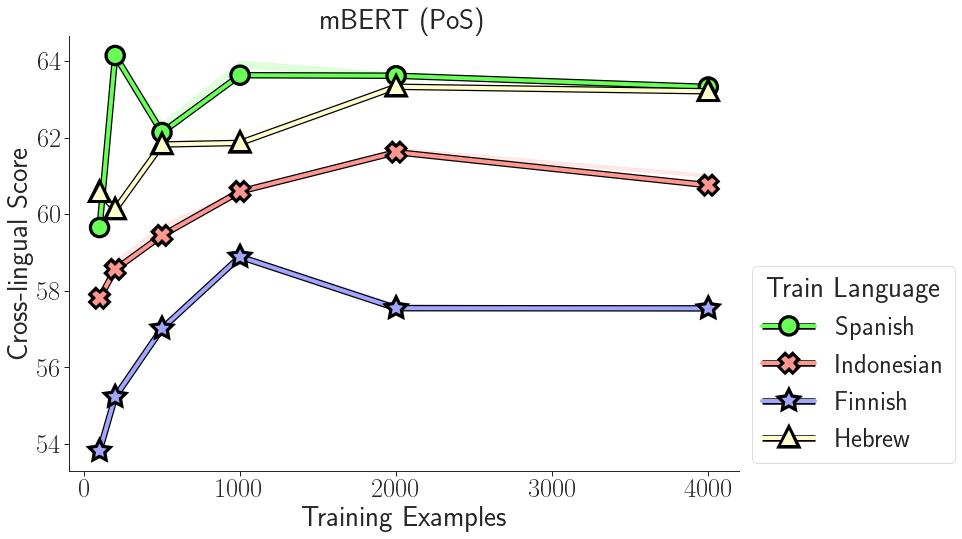

In [12]:
df = data[(data["Train-Language"] != data["Test-Language"]) & (data["Model"] == "mbert")]

plots.prepare_sns()
sns.set_context("paper", font_scale=3)

colors = plots.get_group_colors()
colors = [sns.saturate(c) for c in colors]
markers = {"Spanish": "o",
           "Indonesian": "X",
           "Finnish": (5, 1),
           "Hebrew": "^"}

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.lineplot(x="Size", 
             y="Score", 
             data=df,
             hue="Train-Language",
             palette=colors,
             hue_order=["Spanish", "Indonesian", "Finnish", "Hebrew"],
             style="Train-Language",
             markers=markers,
             dashes=False,
             markersize=15,
             markeredgewidth=0,
             path_effects=[pe.PathPatchEffect(linewidth=6.5, edgecolor="black", facecolor=(0, 0, 0, 0)), pe.Normal()],
             legend=False,
             ax=ax,
             estimator="mean",
             linewidth=4,
             ci=1)

ax.set_title("mBERT (PoS)")
ax.set_ylabel("Cross-lingual Score")
ax.set_xlabel("Training Examples")
ax.legend(markers.keys(), title="Train Language", bbox_to_anchor=(1, 0.5))

sns.despine()
plt.show()
fig.savefig("plots/size_vs_cross_score_pos_mbert.pdf", dpi=400, bbox_inches="tight")
plt.close()

### Sentiment

In [13]:
data = pd.read_excel("results/results_sentiment.xlsx")
data["Score"] *= 100
data["Transfer-Loss"] = data.apply(lambda x: calc_transfer_loss(x, data), axis=1)

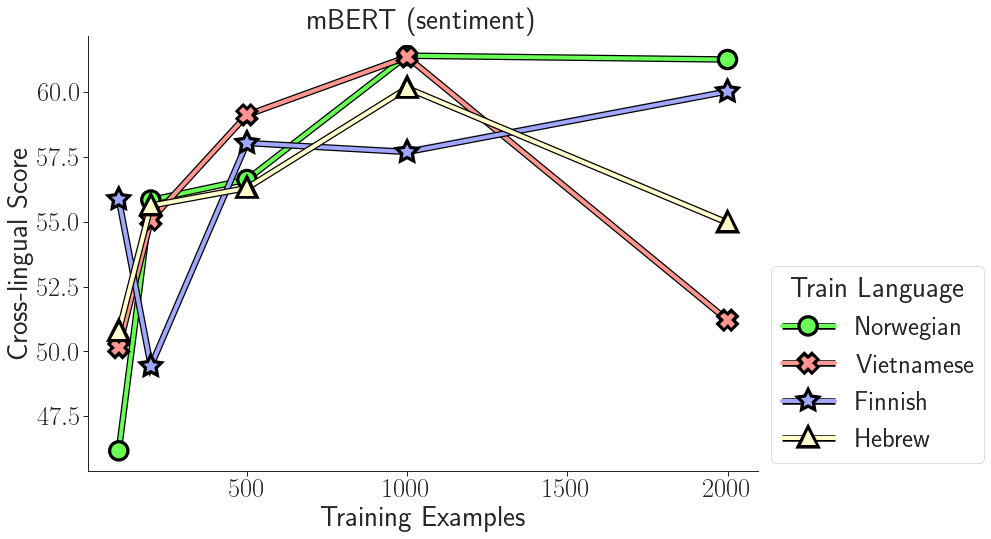

In [19]:
df = data[(data["Train-Language"] != data["Test-Language"]) & (data["Model"] == "mbert")]

plots.prepare_sns()
sns.set_context("paper", font_scale=3)

colors = plots.get_group_colors()
colors = [sns.saturate(c) for c in colors]
markers = {"Norwegian": "o",
           "Vietnamese": "X",
           "Finnish": (5, 1),
           "Hebrew": "^"}

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.lineplot(x="Size", 
             y="Score", 
             data=df,
             hue="Train-Language",
             palette=colors,
             hue_order=["Norwegian", "Vietnamese", "Finnish", "Hebrew"],
             style="Train-Language",
             markers=markers,
             dashes=False,
             markersize=15,
             markeredgewidth=0,
             path_effects=[pe.PathPatchEffect(linewidth=6.5, edgecolor="black", facecolor=(0, 0, 0, 0)), pe.Normal()],
             legend=False,
             ax=ax,
             estimator="mean",
             linewidth=4,
             ci=1)

ax.set_title("mBERT (sentiment)")
ax.set_ylabel("Cross-lingual Score")
ax.set_xlabel("Training Examples")
ax.legend(markers.keys(), title="Train Language", bbox_to_anchor=(1, 0.5))

sns.despine()
plt.show()
fig.savefig("plots/size_vs_cross_score_sentiment_mbert.pdf", dpi=400, bbox_inches="tight")
plt.close()